In [1]:
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import abline_plot

In [2]:
auto = pd.read_csv("../Data/Auto.csv", na_values="?").dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Used the statsmodels package to do the linear regression. See : https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame

In [3]:
model = sm.ols("mpg ~ horsepower", auto)
fit = model.fit()
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.605    
Dependent Variable: mpg              AIC:                2361.3237
Date:               2017-06-15 17:03 BIC:                2369.2662
No. Observations:   392              Log-Likelihood:     -1178.7  
Df Model:           1                F-statistic:        599.7    
Df Residuals:       390              Prob (F-statistic): 7.03e-81 
R-squared:          0.606            Scale:              24.066   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     39.9359    0.7175   55.6598  0.0000  38.5252  41.3465
horsepower    -0.1578    0.0064  -24.4891  0.0000  -0.1705  -0.1452
------------------------------------------------------------------
Omnibus:               16.432       Durbin-Watson:          0.920 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       17.305
Skew:                  0.492        Prob(JB):               0.000 
Kurtosis:              3.299        Condition No.:          322   
==================================================================

"""

*Horsepower* has a negative relationship with *mpg*, the stronger the engine the more gasoline it consumes. 
*Horsepower* predicts around 60.5% of the variance in *mpg*.

In [4]:
new_value = pd.DataFrame({"horsepower": [98]})
fit.predict(new_value)

array([ 24.46707715])

About how to plot the regression line : https://stackoverflow.com/questions/42261976/how-to-plot-statsmodels-linear-regression-ols-cleanly

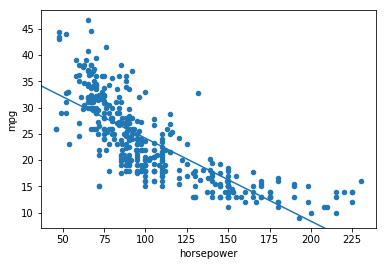

In [5]:
ax = auto.plot(kind='scatter', x='horsepower', y='mpg')
abline_plot(model_results=fit, ax=ax);

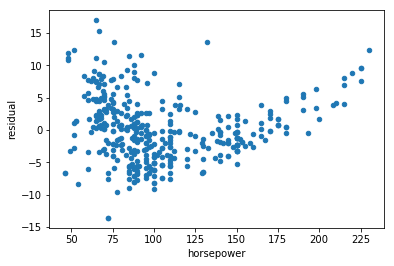

In [6]:
auto["predicted_mpg"] = fit.predict(auto)
auto["residual"] = auto.mpg - auto.predicted_mpg
auto.plot(kind='scatter', x='horsepower', y='residual');

The residual plot shows that the relationship is non-linear.